In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-oct-2022/sample_submission.csv
/kaggle/input/tabular-playground-series-oct-2022/train_9.csv
/kaggle/input/tabular-playground-series-oct-2022/train_3.csv
/kaggle/input/tabular-playground-series-oct-2022/train_4.csv
/kaggle/input/tabular-playground-series-oct-2022/test_dtypes.csv
/kaggle/input/tabular-playground-series-oct-2022/train_8.csv
/kaggle/input/tabular-playground-series-oct-2022/train_dtypes.csv
/kaggle/input/tabular-playground-series-oct-2022/train_5.csv
/kaggle/input/tabular-playground-series-oct-2022/train_2.csv
/kaggle/input/tabular-playground-series-oct-2022/test.csv
/kaggle/input/tabular-playground-series-oct-2022/train_0.csv
/kaggle/input/tabular-playground-series-oct-2022/train_7.csv
/kaggle/input/tabular-playground-series-oct-2022/train_1.csv
/kaggle/input/tabular-playground-series-oct-2022/train_6.csv


# Introduction
1. The kernel is to go through the basic knowledges and skills of feature engineer
2. The kernel refers to the book ***Feature Engineering for Machine Learning*** by Alice Zheng and Amanda Casari

# Modules

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Data Input

In [4]:
train0 = pd.read_csv("../input/tabular-playground-series-oct-2022/train_0.csv")
train0.shape

(2149381, 61)

In [11]:
train0['boost0_timer'].describe()

count    2.149381e+06
mean    -2.727069e+00
std      3.301398e+00
min     -9.984000e+00
25%     -5.477000e+00
50%     -6.904000e-01
75%      0.000000e+00
max      0.000000e+00
Name: boost0_timer, dtype: float64

In [15]:
train0.columns

Index(['game_num', 'event_id', 'event_time', 'ball_pos_x', 'ball_pos_y',
       'ball_pos_z', 'ball_vel_x', 'ball_vel_y', 'ball_vel_z', 'p0_pos_x',
       'p0_pos_y', 'p0_pos_z', 'p0_vel_x', 'p0_vel_y', 'p0_vel_z', 'p0_boost',
       'p1_pos_x', 'p1_pos_y', 'p1_pos_z', 'p1_vel_x', 'p1_vel_y', 'p1_vel_z',
       'p1_boost', 'p2_pos_x', 'p2_pos_y', 'p2_pos_z', 'p2_vel_x', 'p2_vel_y',
       'p2_vel_z', 'p2_boost', 'p3_pos_x', 'p3_pos_y', 'p3_pos_z', 'p3_vel_x',
       'p3_vel_y', 'p3_vel_z', 'p3_boost', 'p4_pos_x', 'p4_pos_y', 'p4_pos_z',
       'p4_vel_x', 'p4_vel_y', 'p4_vel_z', 'p4_boost', 'p5_pos_x', 'p5_pos_y',
       'p5_pos_z', 'p5_vel_x', 'p5_vel_y', 'p5_vel_z', 'p5_boost',
       'boost0_timer', 'boost1_timer', 'boost2_timer', 'boost3_timer',
       'boost4_timer', 'boost5_timer', 'player_scoring_next',
       'team_scoring_next', 'team_A_scoring_within_10sec',
       'team_B_scoring_within_10sec'],
      dtype='object')

**About Features**
1. A feature is a numeric representation of raw data.
2. The category of feature can be generalized into **scalers**, **vectors**, and **spaces**.
3. A single numeric feature is known scalar. An ordered list of scalars is known as a vector. Vectors sit within a vector space. 

**Feature Engineering**

the process of extracting novel features and gaining new insight into training data approriate to model training. 


# Numeric Feature

## Dealing with count numeric feature
1. bining or Quantization
2. Group numeric feature into several bins and get rid of the actual count values. 
3. The train model will not need to struggle on predicting the minor differences between the raw counts. 
4. Raw counts that span several orders of magnitude are problematic for many models. In a linear model, the same linear coefficient would have to work for all possible values of the counts.
5. Large counts could wreak havoc in unsupervised learning methods such as k-means clustering using euclidean distance as a similarity function to measure the similarity.
6. There is no count feature in the train data, we can take the features of boost{i}_timer as example 


### Binary binning boost feature 
1. binning the boost feature into 1 (available) or 0 (unavailable)


In [48]:
# Binning the boost features
boost_feat = [f'boost{i}_timer' for i in range(6)]
train0_boost = train0[boost_feat]

In [55]:
train0_boost[]

,boost0_timer,boost1_timer,boost2_timer,boost3_timer,boost4_timer,boost5_timer
0,0.0,0.000,0.000,0.000,0.00,0.000
1,0.0,0.000,0.000,0.000,0.00,0.000
2,0.0,0.000,0.000,0.000,0.00,0.000
3,0.0,0.000,0.000,0.000,0.00,0.000
4,0.0,0.000,0.000,0.000,0.00,0.000
...,...,...,...,...,...,...
2149376,0.0,-6.918,-2.748,-2.418,-9.05,-4.574
2149377,0.0,-6.810,-2.639,-2.310,-8.94,-4.465
2149378,0.0,-6.700,-2.531,-2.201,-8.83,-4.360
2149379,0.0,-6.590,-2.422,-2.092,-8.72,-4.250


In [54]:
boost_feat

['boost0_timer',
 'boost1_timer',
 'boost2_timer',
 'boost3_timer',
 'boost4_timer',
 'boost5_timer']

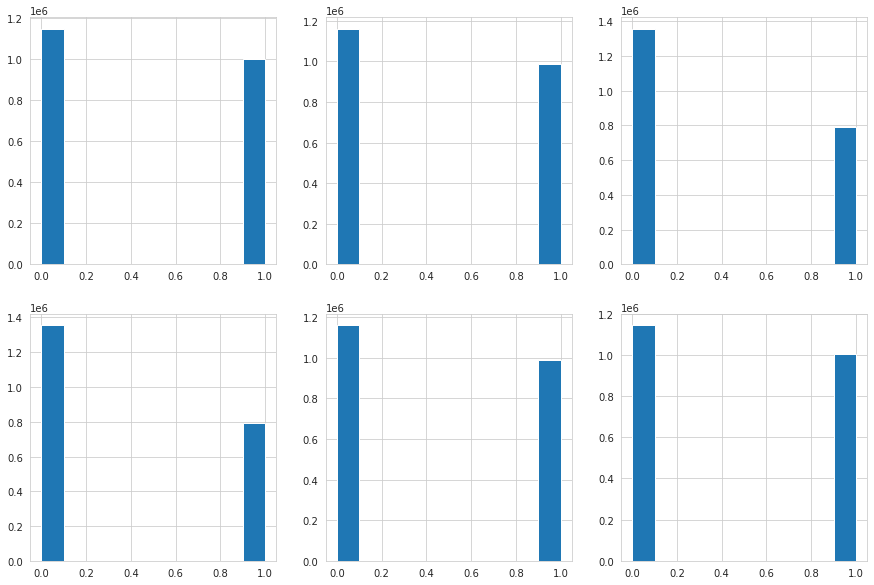

In [73]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
for each, ax in zip(boost_feat, axes.ravel()):
    ax.hist(train0_boost[each])
plt.show()

In [61]:
for each in boost_feat:
    train0_boost[each] = np.where(train0_boost[each] == 0.0, 1, 0)

In [62]:
train0_boost.sum()/train0_boost.count()

boost0_timer    0.465604
boost1_timer    0.460250
boost2_timer    0.369157
boost3_timer    0.370028
boost4_timer    0.460908
boost5_timer    0.467971
dtype: float64

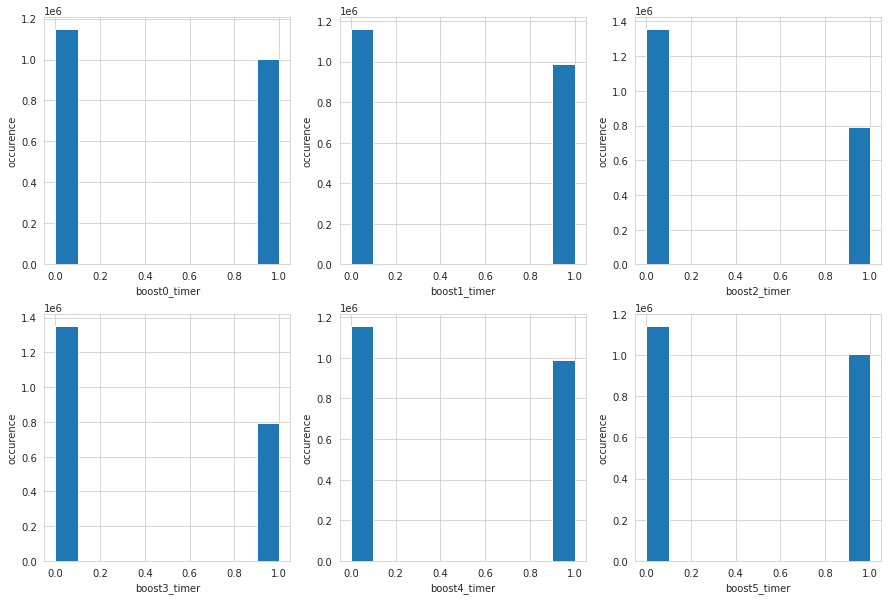

In [72]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
for each, ax in zip(boost_feat, axes.ravel()):
    ax.hist(train0_boost[each])
    ax.set_xlabel(each)
    ax.set_ylabel('occurence')
plt.show()

In [75]:
train0_boost = train0[boost_feat]

In [78]:
train0_boost.describe()

,boost0_timer,boost1_timer,boost2_timer,boost3_timer,boost4_timer,boost5_timer
count,2.149381e+06,2.149381e+06,2.149381e+06,2.149381e+06,2.149381e+06,2.149381e+06
mean,-2.727069e+00,-2.754303e+00,-3.226214e+00,-3.220364e+00,-2.751841e+00,-2.718325e+00
std,3.301398e+00,3.306345e+00,3.364020e+00,3.363124e+00,3.306341e+00,3.300695e+00
min,-9.984000e+00,-9.984000e+00,-9.970000e+00,-9.984000e+00,-9.970000e+00,-9.970000e+00
25%,-5.477000e+00,-5.527000e+00,-6.200000e+00,-6.195000e+00,-5.523000e+00,-5.465000e+00
50%,-6.904000e-01,-7.900000e-01,-2.193000e+00,-2.186000e+00,-7.803000e-01,-6.540000e-01
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


### Fixed-width binning